In [ ]:
import numpy as np
import pandas as pd
file_path=r"C:\Users\91891\Downloads\spotify_synthetic_data.csv"
spotify_data=pd.read_csv(file_path)
spotify_data.head(),
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        2000 non-null   object 
 1   artist            2000 non-null   object 
 2   album             2000 non-null   object 
 3   danceability      2000 non-null   float64
 4   energy            2000 non-null   float64
 5   loudness          2000 non-null   float64
 6   speechiness       2000 non-null   float64
 7   acousticness      2000 non-null   float64
 8   instrumentalness  2000 non-null   float64
 9   liveness          2000 non-null   float64
 10  valence           2000 non-null   float64
 11  tempo             2000 non-null   float64
 12  genre             2000 non-null   object 
dtypes: float64(9), object(4)
memory usage: 203.3+ KB


In [ ]:
# Display summary statistics for numerical columns
spotify_data.describe()


danceability       energy     loudness  speechiness  acousticness  \
count   2000.000000  2000.000000  2000.000000  2000.000000   2000.000000   
mean       0.491582     0.499139   -30.821458     0.495332      0.503939   
std        0.287111     0.290094    17.168127     0.282475      0.292171   
min        0.000012     0.000227   -59.985540     0.000053      0.000158   
25%        0.244863     0.247338   -45.593945     0.256687      0.250235   
50%        0.492552     0.492184   -31.387626     0.495187      0.499853   
75%        0.734485     0.755169   -16.226360     0.734062      0.762989   
max        0.999558     0.999461    -0.047562     0.999505      0.999673   

       instrumentalness     liveness      valence        tempo  
count       2000.000000  2000.000000  2000.000000  2000.000000  
mean           0.495725     0.499874     0.513131   131.326019  
std            0.293097     0.287187     0.283764    40.553318  
min            0.001334     0.000310     0.000252    60.085629  
25%            0.236606     0.252167     0.275570    96.929524  
50%            0.488290     0.501131     0.525030   131.017253  
75%            0.756744     0.750194     0.750568   166.173707  
max            0.998845     0.999925     0.999150   199.982001

In [ ]:
# Check for missing values in each column
spotify_data.isnull().sum()


track_name          0
artist              0
album               0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

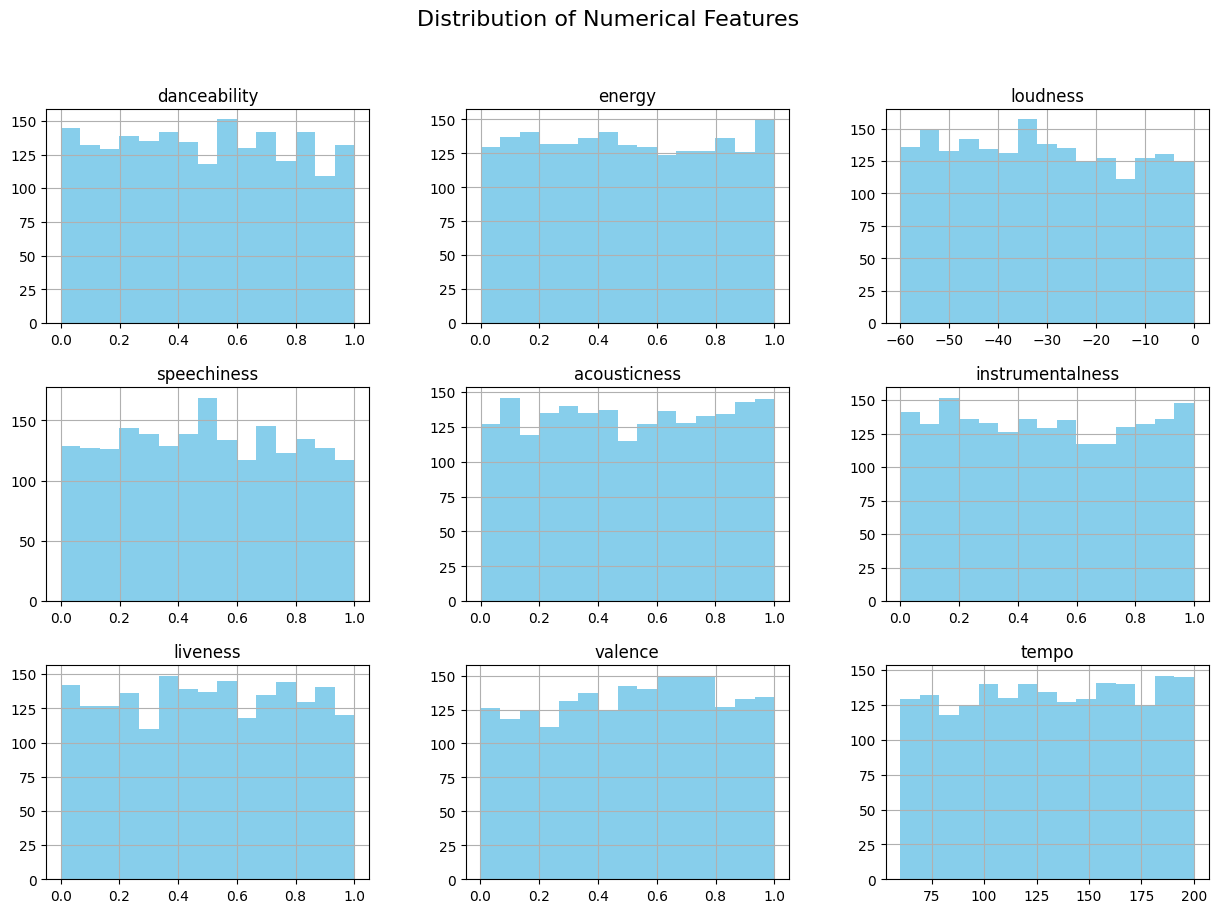

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Plot histograms for each numerical feature
spotify_data[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate the correlation matrix
correlation_matrix = spotify_data[numerical_cols].corr()



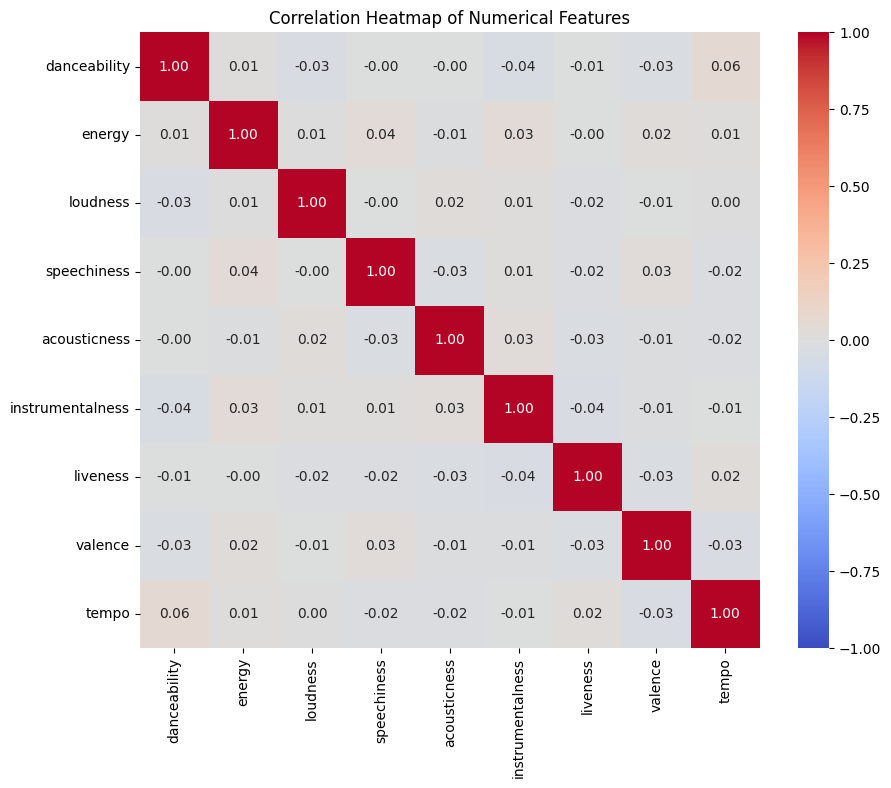

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:
# Top genres by count
top_genres = spotify_data['genre'].value_counts().head(10)
print("Top 10 Genres:\n", top_genres)

# Top artists by count
top_artists = spotify_data['artist'].value_counts().head(10)
print("Top 10 Artists:\n", top_artists)


Top 10 Genres:
 genre
Electronic    294
Jazz          261
Pop           256
Country       243
Classical     242
R&B           239
Hip-Hop       238
Rock          227
Name: count, dtype: int64
Top 10 Artists:
 artist
Artist_62    35
Artist_17    31
Artist_99    30
Artist_33    29
Artist_92    29
Artist_90    29
Artist_51    28
Artist_59    26
Artist_1     26
Artist_29    26
Name: count, dtype: int64


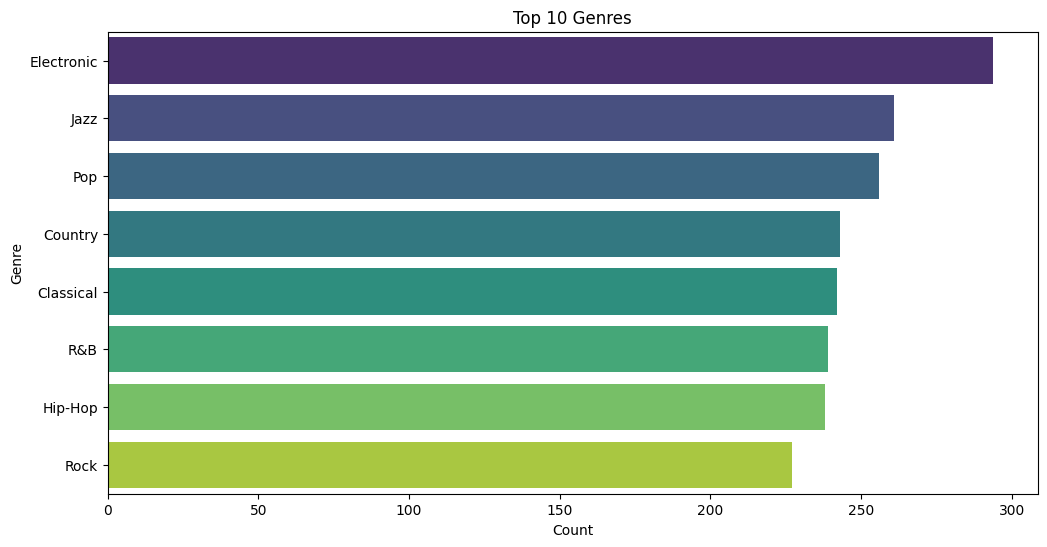

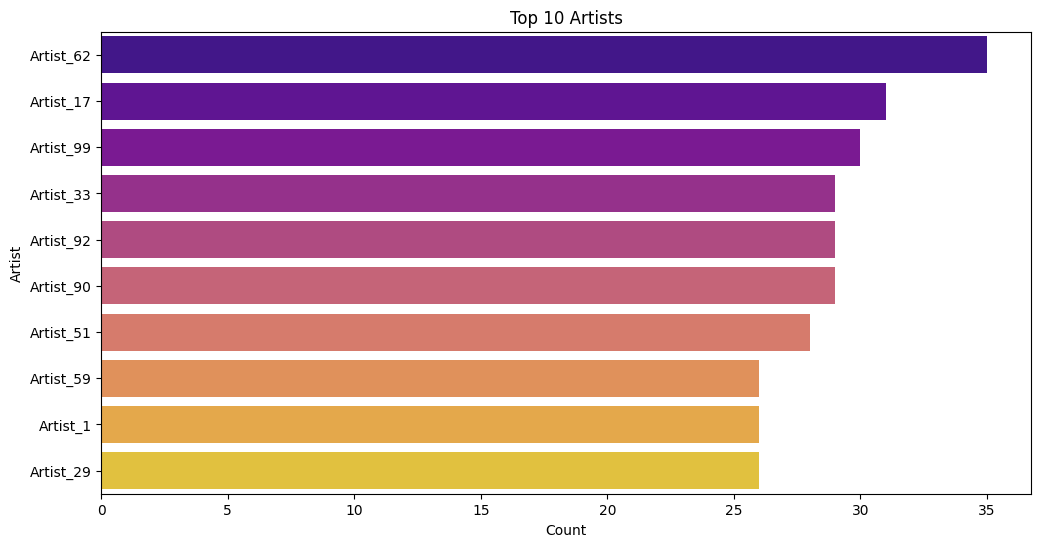

In [ ]:
# Plot the top genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette="viridis", legend=False)

plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Plot the top artists
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index,hue=top_artists.index, palette="plasma",legend=False)
plt.title("Top 10 Artists")
plt.xlabel("Count")
plt.ylabel("Artist")
plt.show()



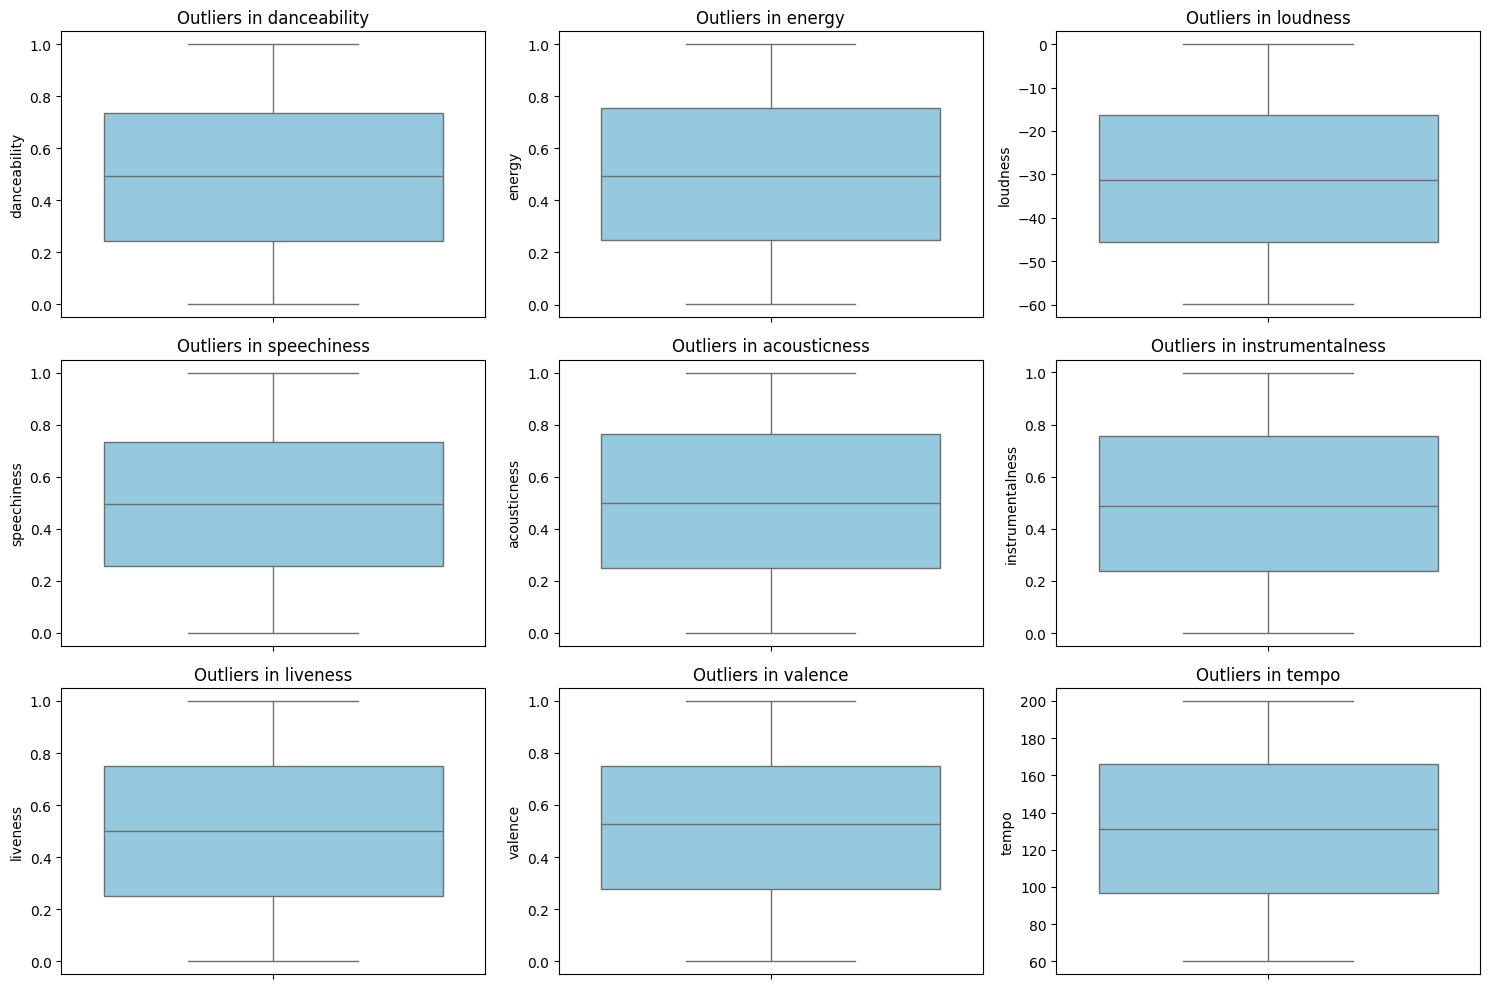

In [ ]:
# Plot box plots for each numerical feature to detect outliers
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=spotify_data[col], color="skyblue")
    plt.title(f"Outliers in {col}")

plt.tight_layout()
plt.show()


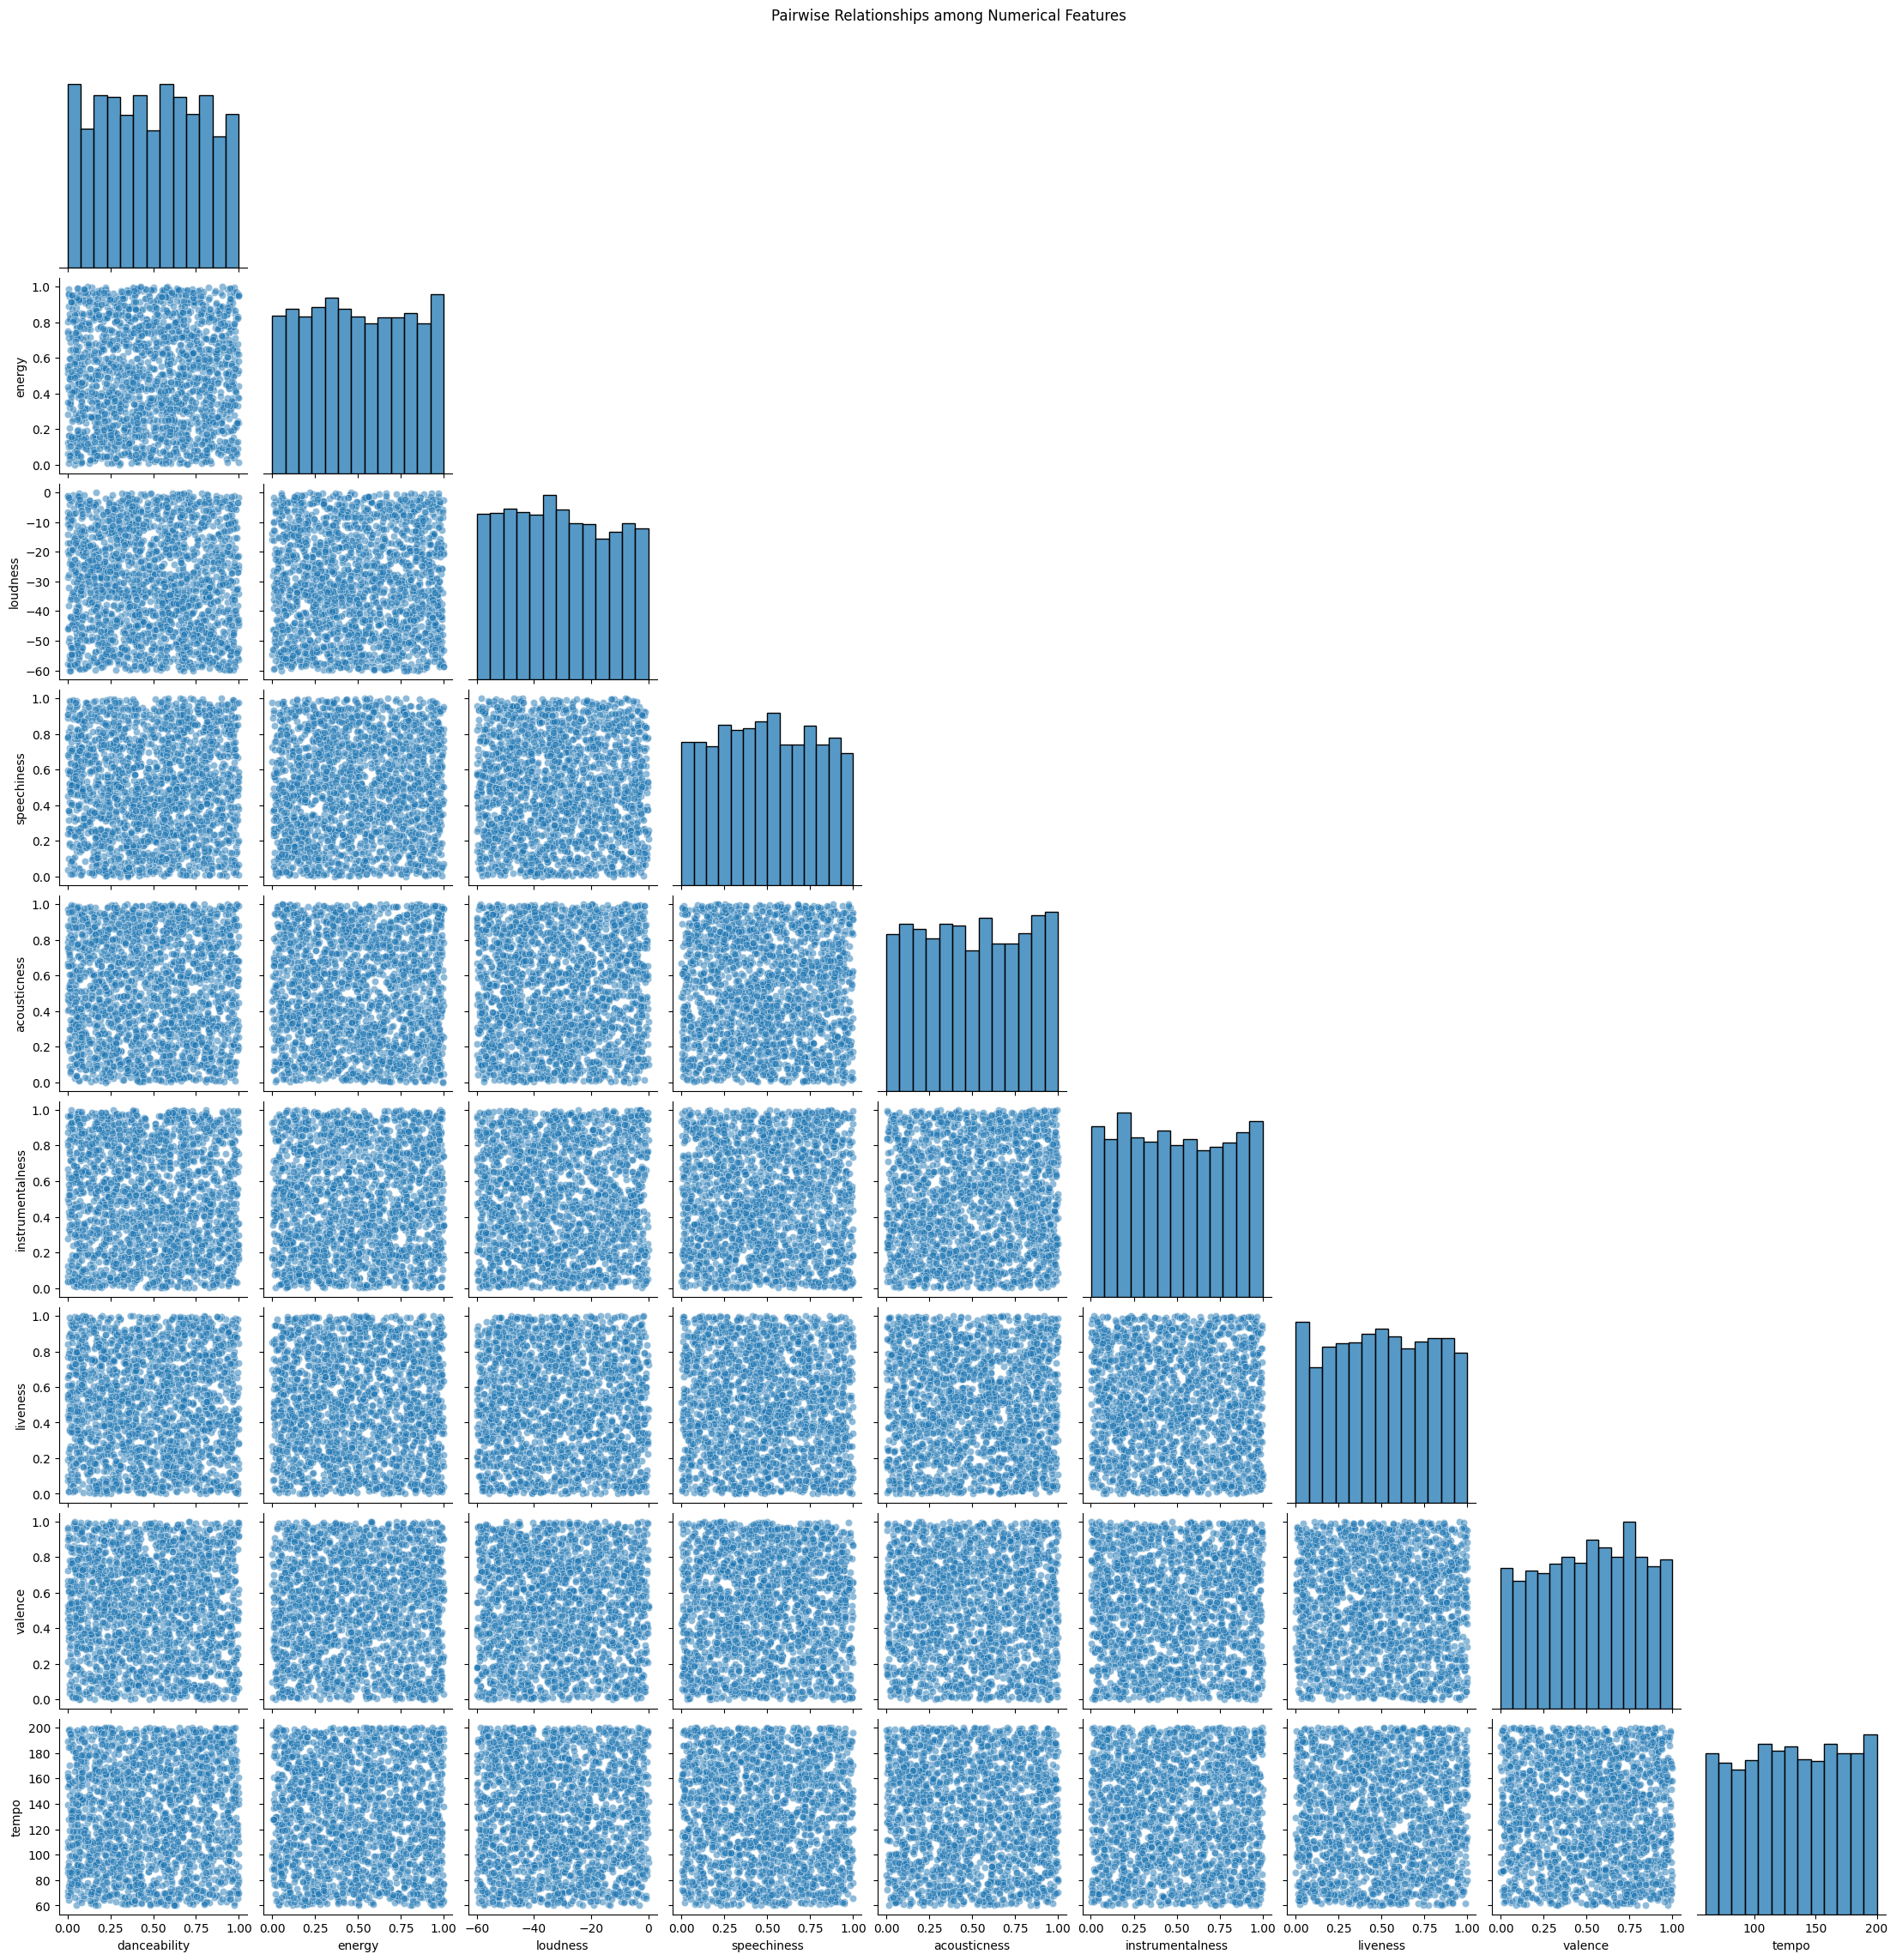

In [ ]:
# Pair plot to explore relationships between numerical features
sns.pairplot(spotify_data[numerical_cols], corner=True, plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Relationships among Numerical Features", y=1.02)
plt.show()


Index(['track_name', 'artist', 'album', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'genre'],
      dtype='object')


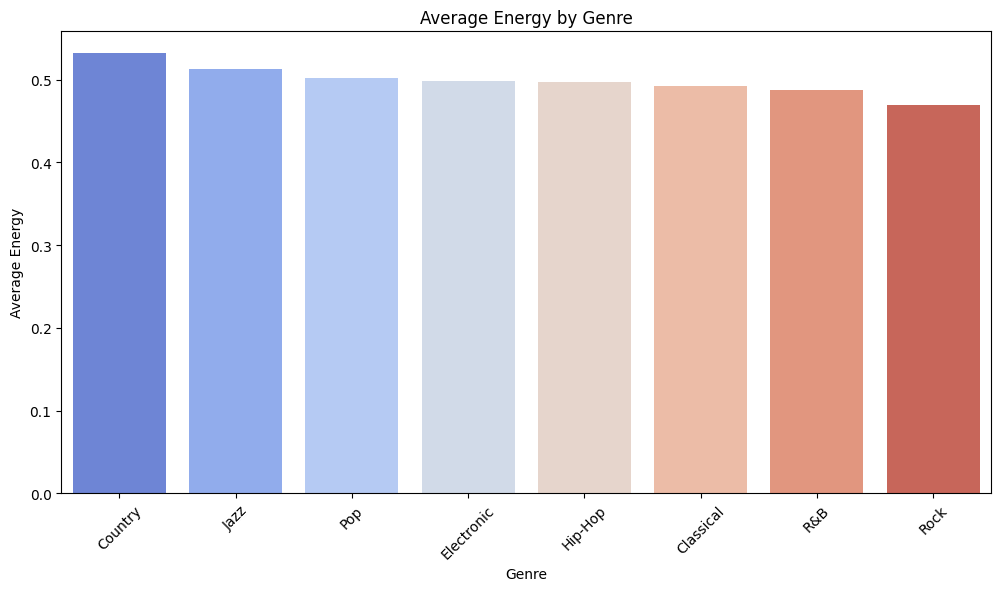

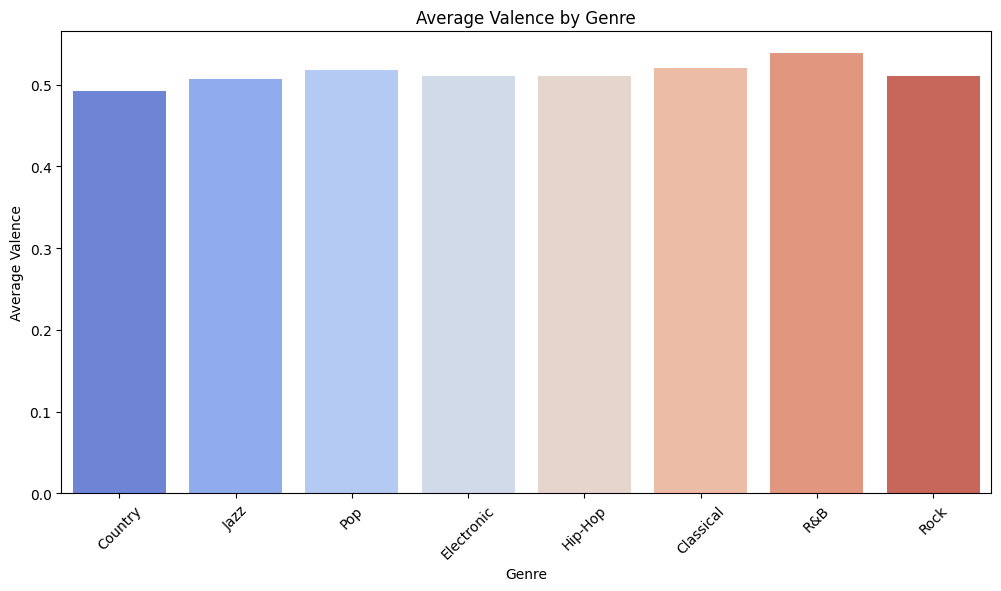

In [ ]:

# Step 1: Verify that 'valence' is in the original DataFrame
print(spotify_data.columns)

# Step 2: Recreate `top_genre_data` to include both `energy` and `valence`
top_genre_data = spotify_data.groupby('genre', as_index=False)[['energy', 'valence']].mean()

# Step 3: Sort and filter the top genres by average energy
top_genre_data = top_genre_data.sort_values(by='energy', ascending=False).head(10)




# Energy by Genre
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genre_data, x='genre', y='energy', errorbar=None, palette="coolwarm", hue="genre", dodge=False)
plt.title("Average Energy by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Energy")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove legend since hue is for color compliance
plt.show()

# Valence by Genre
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genre_data, x='genre', y='valence', errorbar=None, palette="coolwarm", hue="genre", dodge=False)
plt.title("Average Valence by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Valence")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove legend since hue is for color compliance
plt.show()



In [ ]:


# Now import the required modules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting key numerical features for clustering
# Your clustering code here...

# Selecting key numerical features for clustering
features = spotify_data[['danceability', 'energy', 'loudness', 'speechiness',
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


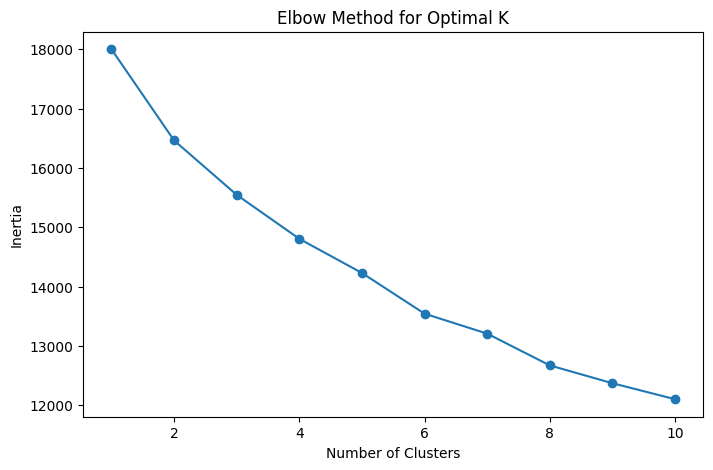

In [ ]:
# Determine optimal number of clusters using the elbow method
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Replace '4' with the number of cores you want to use

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Your code here

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


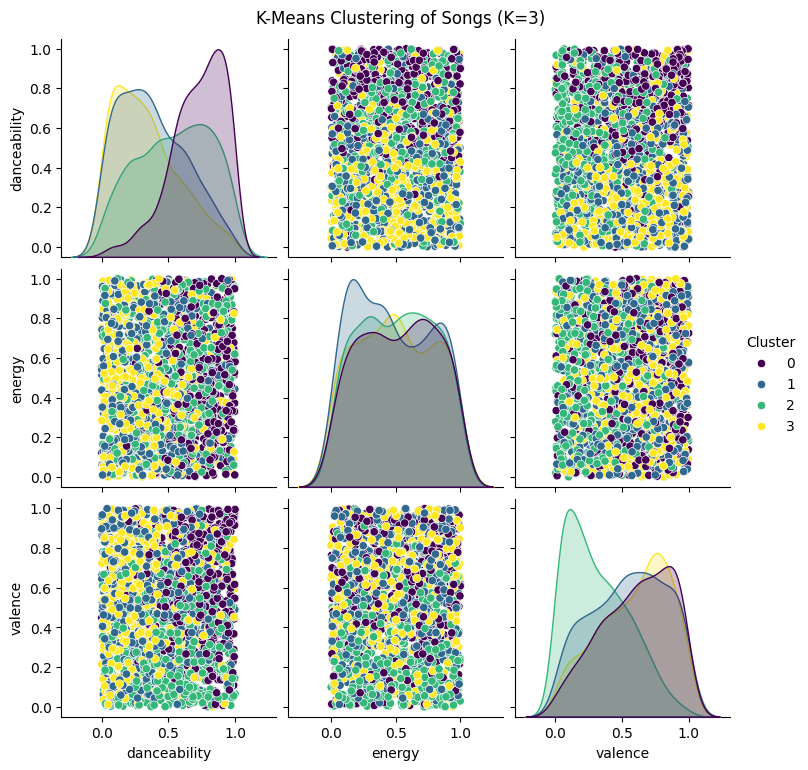

In [ ]:
# Assuming 4 clusters based on the elbow method
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
spotify_data['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize clusters in a pair plot for two representative features
sns.pairplot(spotify_data, vars=['danceability', 'energy', 'valence'], hue='Cluster', palette="viridis")
plt.suptitle("K-Means Clustering of Songs (K=3)", y=1.02)
plt.show()


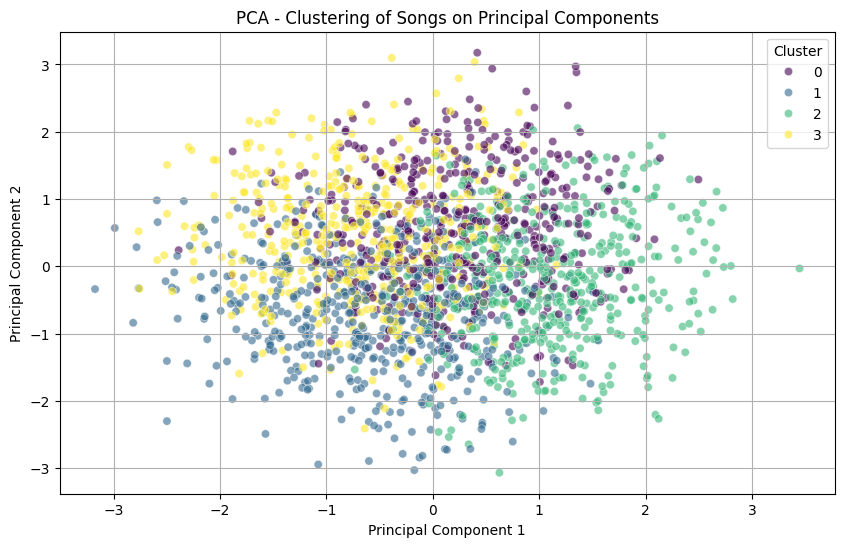

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
spotify_data['PC1'] = principal_components[:, 0]
spotify_data['PC2'] = principal_components[:, 1]

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=spotify_data, palette="viridis", alpha=0.6)
plt.title("PCA - Clustering of Songs on Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


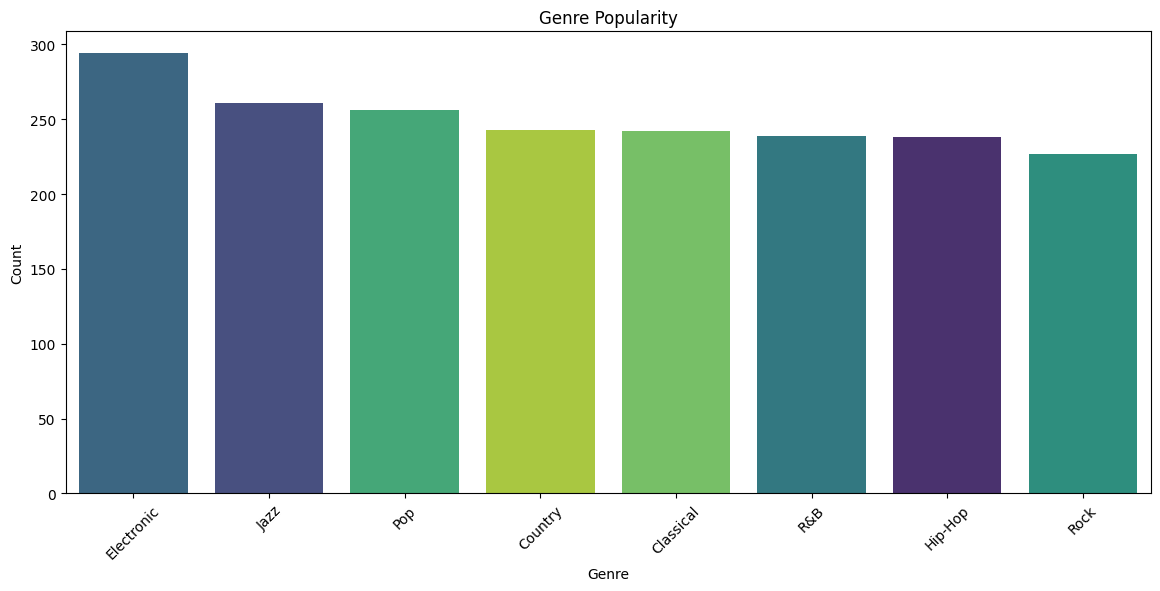

In [ ]:
# Countplot for Genre Popularity
plt.figure(figsize=(14, 6))
sns.countplot(data=spotify_data, x='genre', hue='genre', order=spotify_data['genre'].value_counts().index, palette="viridis", dodge=False, legend=False)
plt.title("Genre Popularity")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



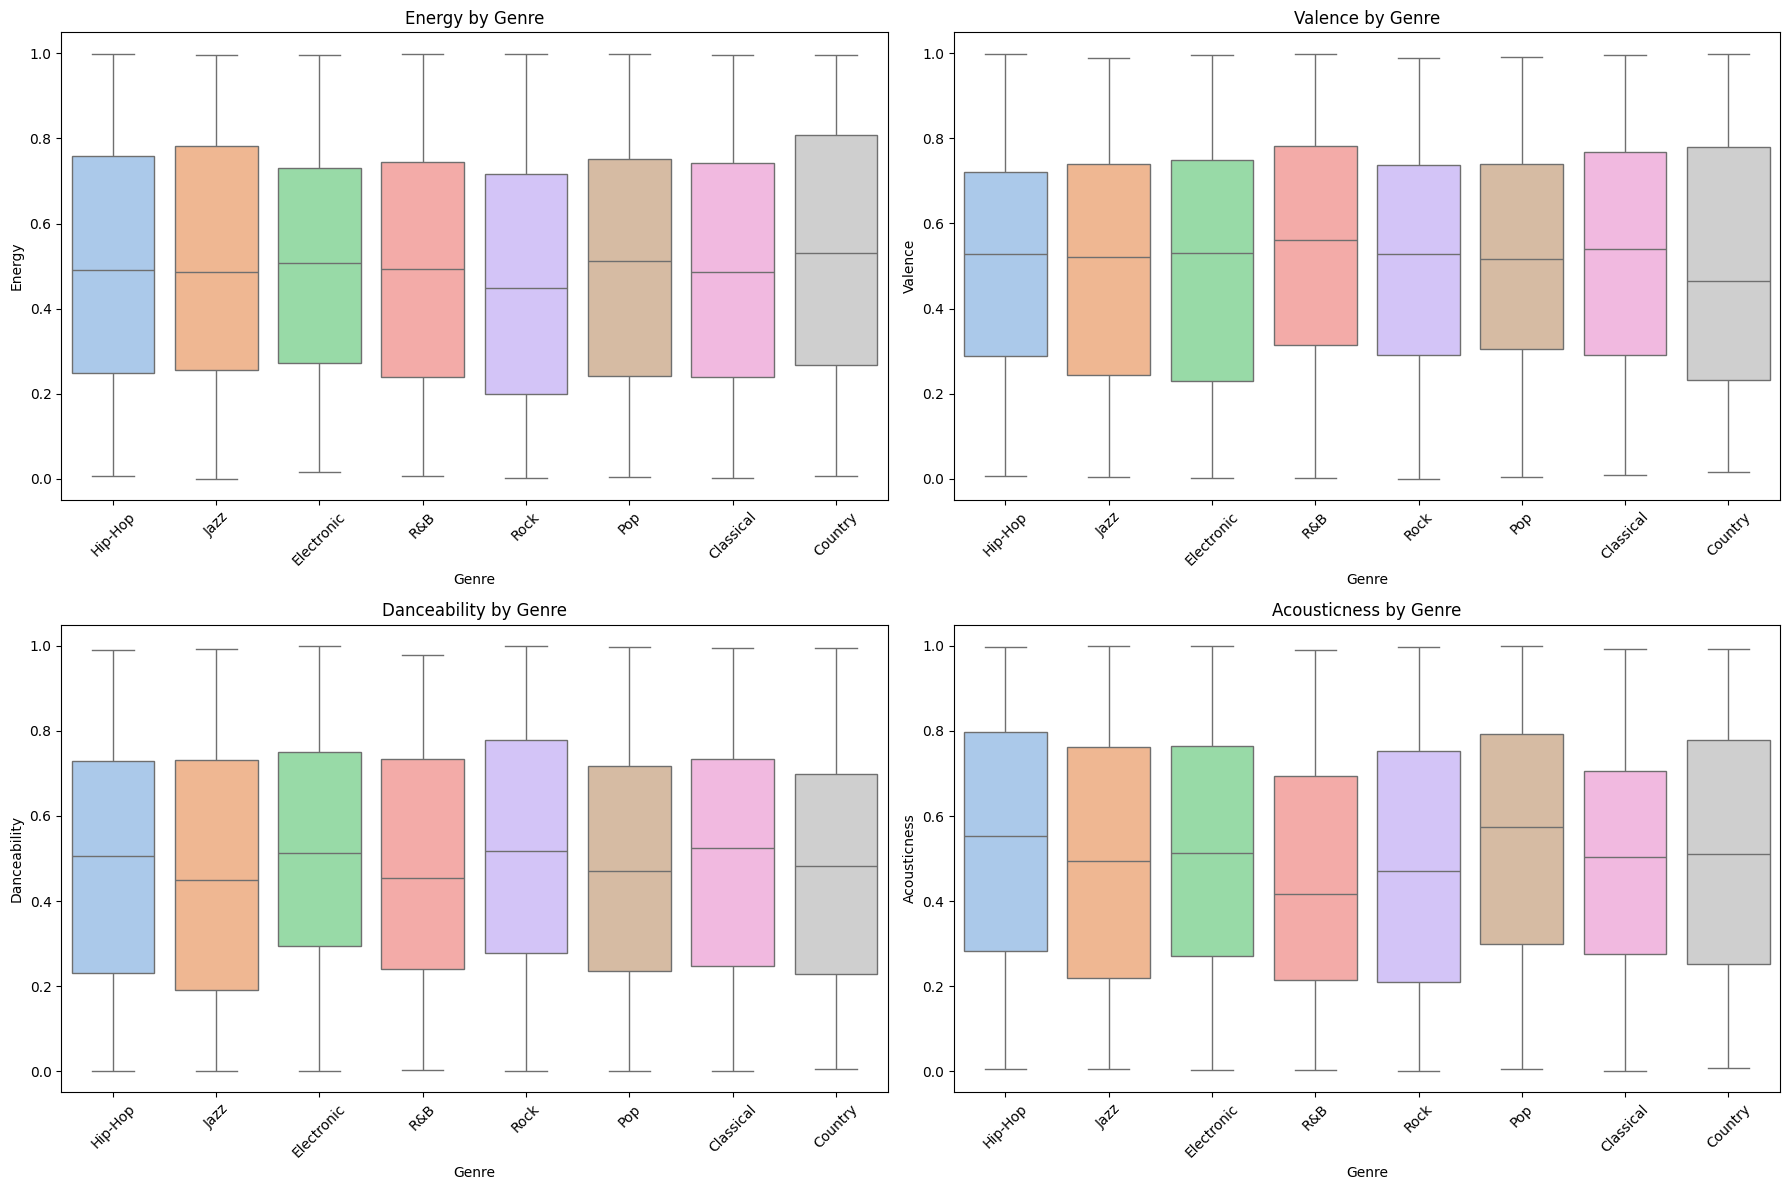

In [ ]:
# Define the audio features we want to examine
audio_features = ['energy', 'valence', 'danceability', 'acousticness']

# Create subplots for each feature
plt.figure(figsize=(18, 12))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=spotify_data, x='genre',hue='genre', y=feature, palette="pastel",legend=False)
    plt.title(f"{feature.capitalize()} by Genre")
    plt.xlabel("Genre")
    plt.ylabel(feature.capitalize())
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


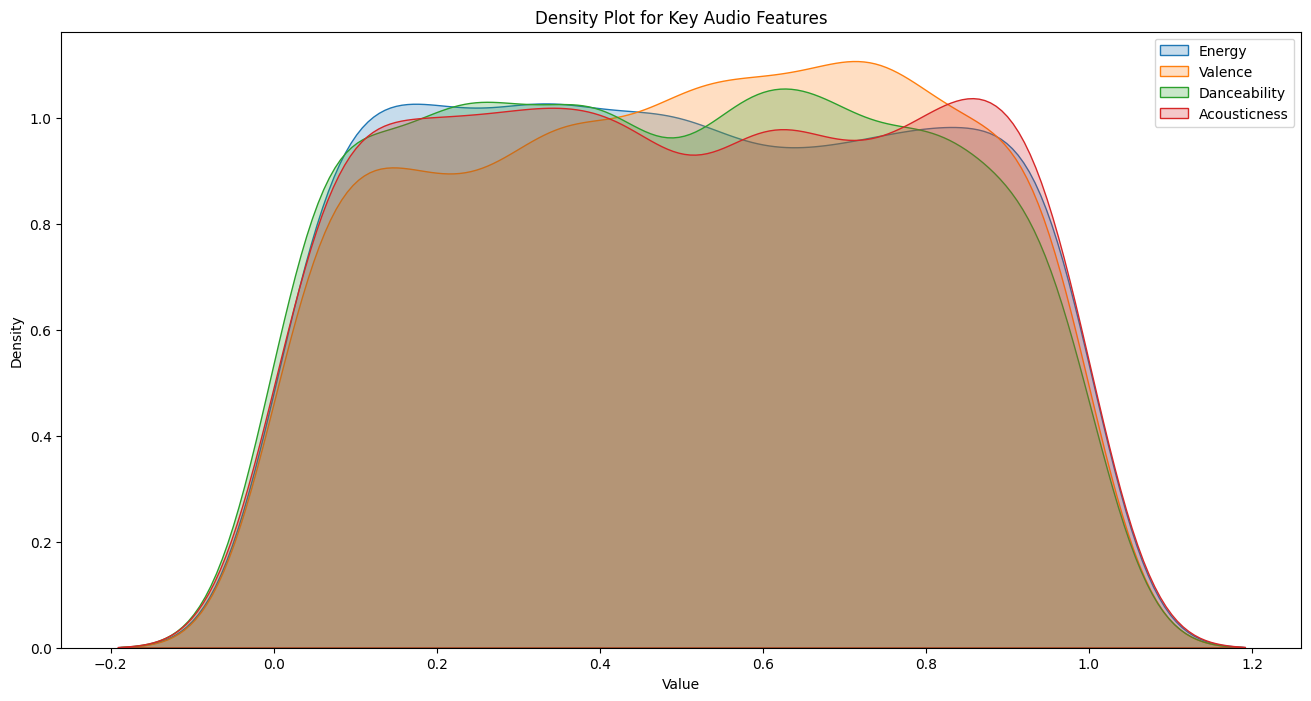

In [ ]:
# Density plots for key audio features
plt.figure(figsize=(16, 8))
for i, feature in enumerate(audio_features, 1):
    sns.kdeplot(spotify_data[feature], label=feature.capitalize(), fill=True)

plt.title("Density Plot for Key Audio Features")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


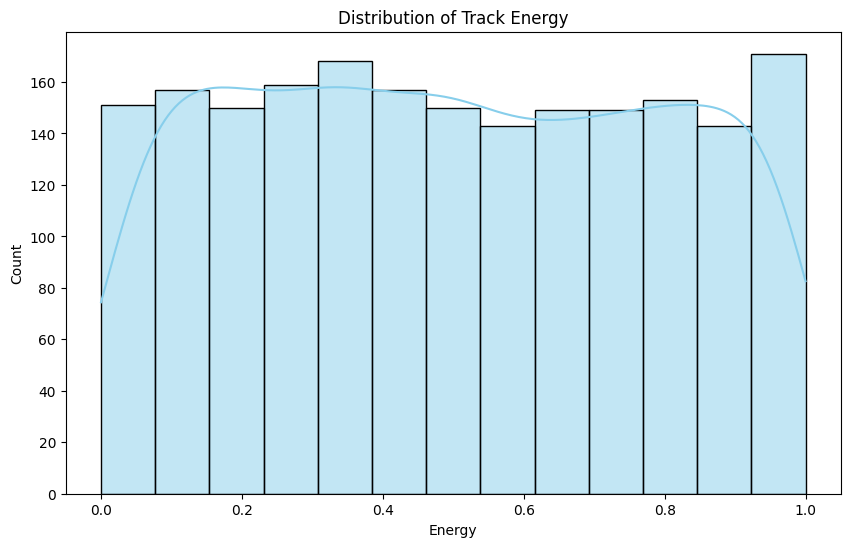

In [ ]:
# Distribution of Energy
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['energy'], kde=True, color="skyblue")
plt.title("Distribution of Track Energy")
plt.xlabel("Energy")
plt.show()

